In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Simple Linear Regression Model

In [3]:
df = pd.read_csv('Advertising.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [16]:
X = df.drop('sales',axis=1)

In [28]:
y = df['sales']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train,y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
MAE = mean_absolute_error(y_test, y_pred)

In [39]:
MAE

1.213745773614481

In [40]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

In [50]:
RMSE

1.516151937599388

In [51]:
df['sales'].mean()

14.022500000000003

In [52]:
test_res = y_test - y_pred

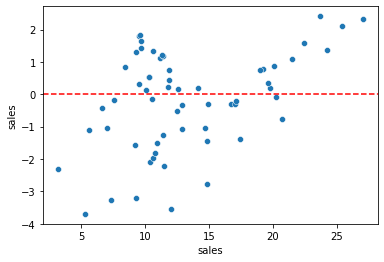

In [55]:
sns.scatterplot(x=y_test, y=test_res)
plt.axhline(y=0, color='red', linestyle='--')

In [58]:
len(test_res)

60

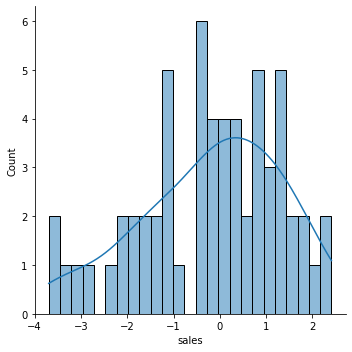

In [60]:
sns.displot(x=test_res, bins=25, kde=True)

In [61]:
import scipy as sp

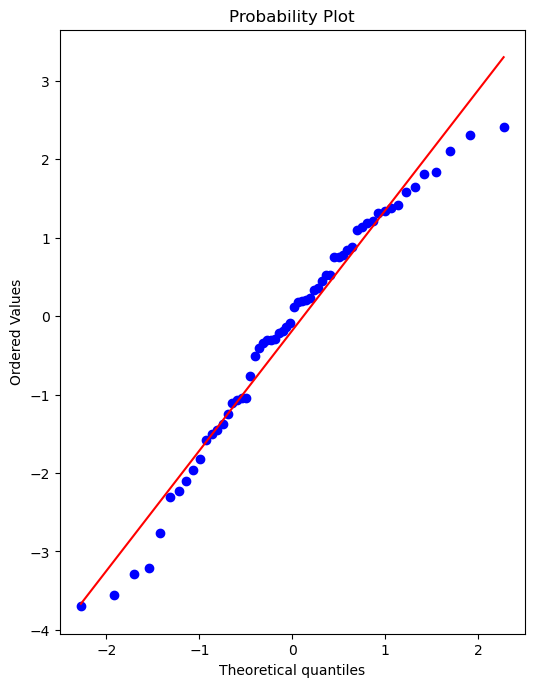

In [62]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

In [63]:
final_model = LinearRegression()

In [64]:
final_model.fit(X,y)

LinearRegression()

In [65]:
y_hat = final_model.predict(X)

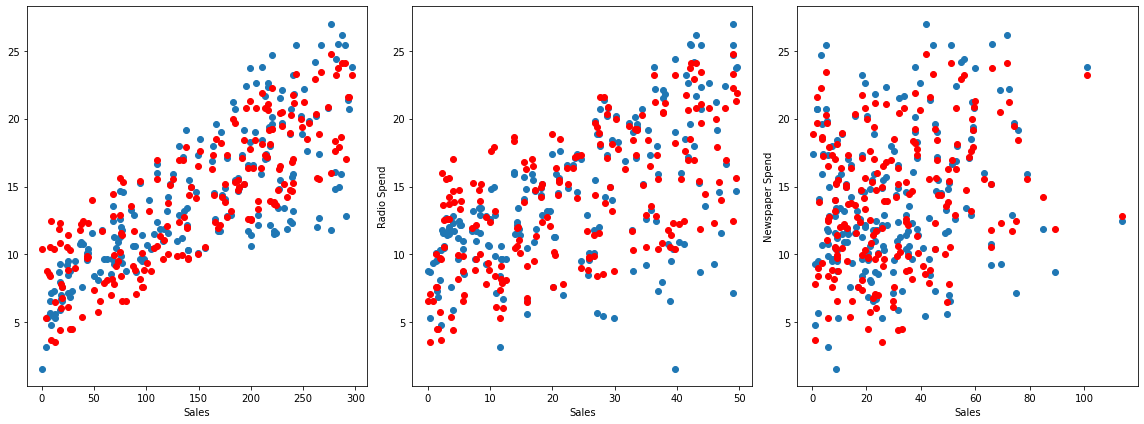

In [76]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_xlabel('Sales')
axes[1].set_ylabel('TV Spend')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_xlabel('Sales')
axes[1].set_ylabel('Radio Spend')

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_xlabel('Sales')
axes[2].set_ylabel('Newspaper Spend')
plt.tight_layout()


In [77]:
residuals = y - y_hat

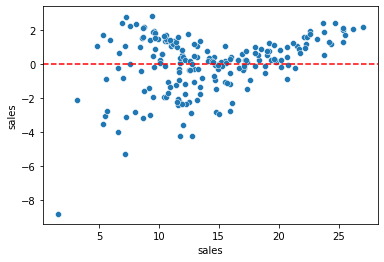

In [82]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(color='red',linestyle='--')

In [83]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [84]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])

In [85]:
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [87]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [88]:
campaign = [[149,22,12]]

In [89]:
final_model.predict(campaign)

array([13.893032])

In [91]:
from joblib import dump,load

In [92]:
dump(final_model,'simple_linear_sales_model.joblib')

['simple_linear_sales_model.joblib']

In [93]:
loaded_model = load('simple_linear_sales_model.joblib')

In [94]:
loaded_model.predict(campaign)

array([13.893032])